In [1]:
from utils.corpus import Corpus
from utils.visualization import Visualizer

corpus = Corpus(registry_path = 'utils/article_registry.json')

from utils.model import Model

model = Model(corpus, 90, seed=36775)
model.load_topics()

viz = Visualizer(model)

1950 - 1959: 38
1960 - 1969: 31
1970 - 1979: 53
1980 - 1989: 94
1990 - 1999: 108
2000 - 2009: 144
2010 - 2019: 341
2020 - 2029: 66


<BarContainer object of 6 artists>

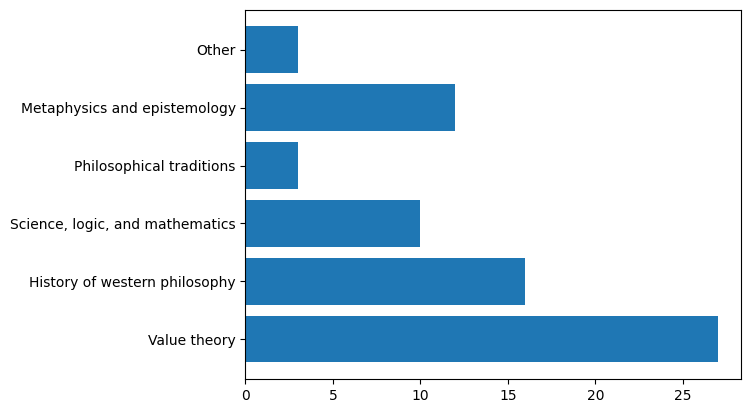

In [22]:
plt.barh(list(main_areas_count.keys()), main_areas_count.values())

## Area plot counting how many documents we have per area and per year

<Axes: xlabel='Date'>

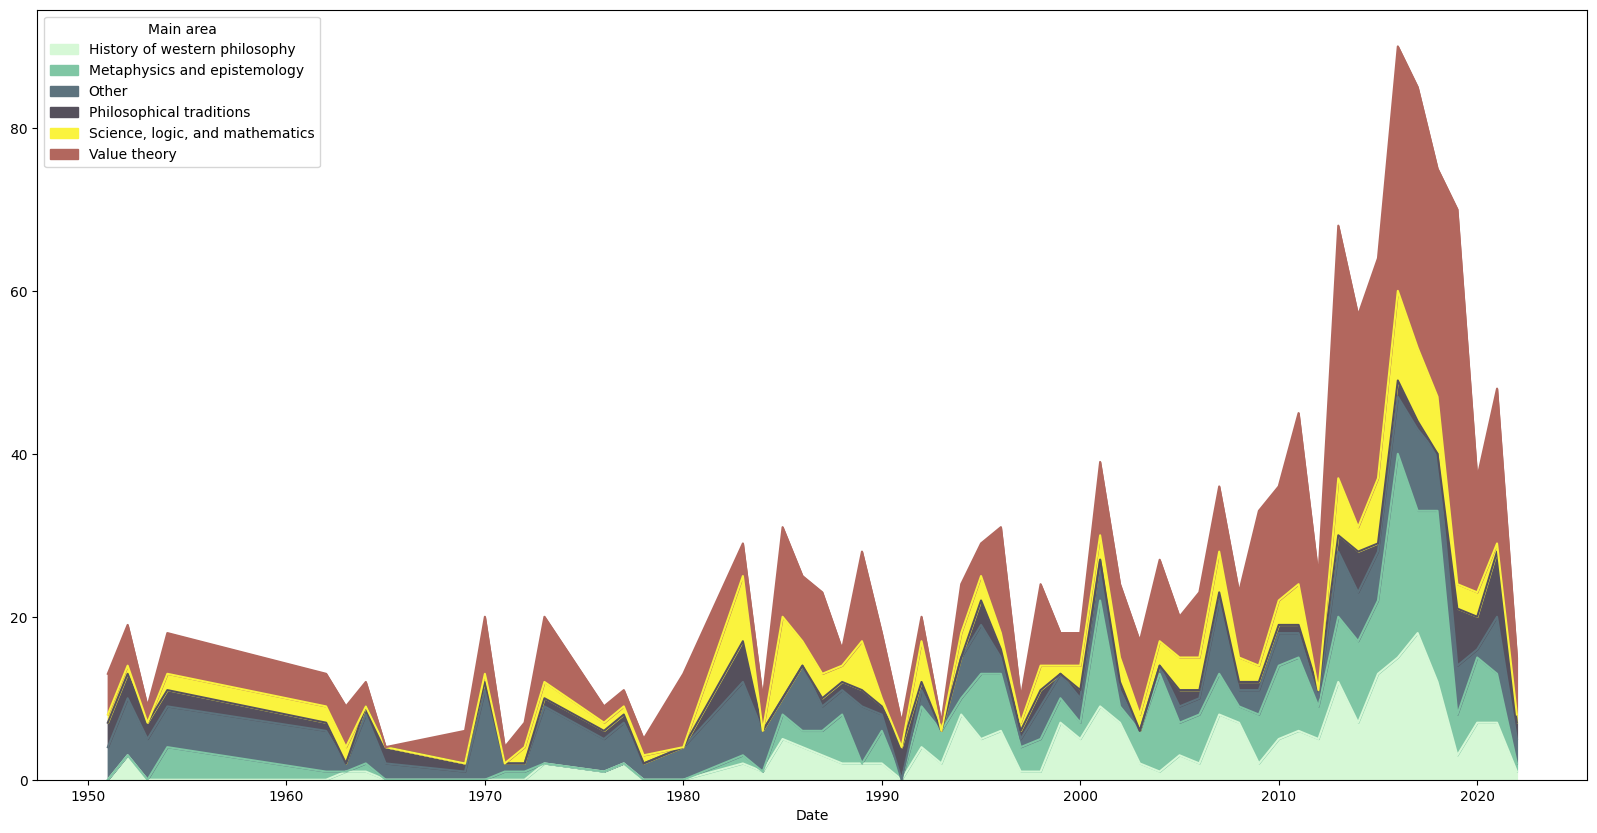

In [36]:
import matplotlib as mpl

# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#d6f8d6","#7fc6a4","#5d737e","#55505c","#faf33e", "#B2675E"]) 

_, ax = plt.subplots(1, 1, figsize=(20, 10))
df.groupby(['Date', 'Main area']).size().unstack().plot(kind='area', stacked=True, ax=ax)

In [39]:
df_counts_main_area_per_year = df.groupby(['Date', 'Main area']).size().unstack()

In [40]:
normalized_df_counts_main_area_per_year = df_counts_main_area_per_year.div(df_counts_main_area_per_year.sum(axis=1), axis=0)

<Axes: xlabel='Date'>

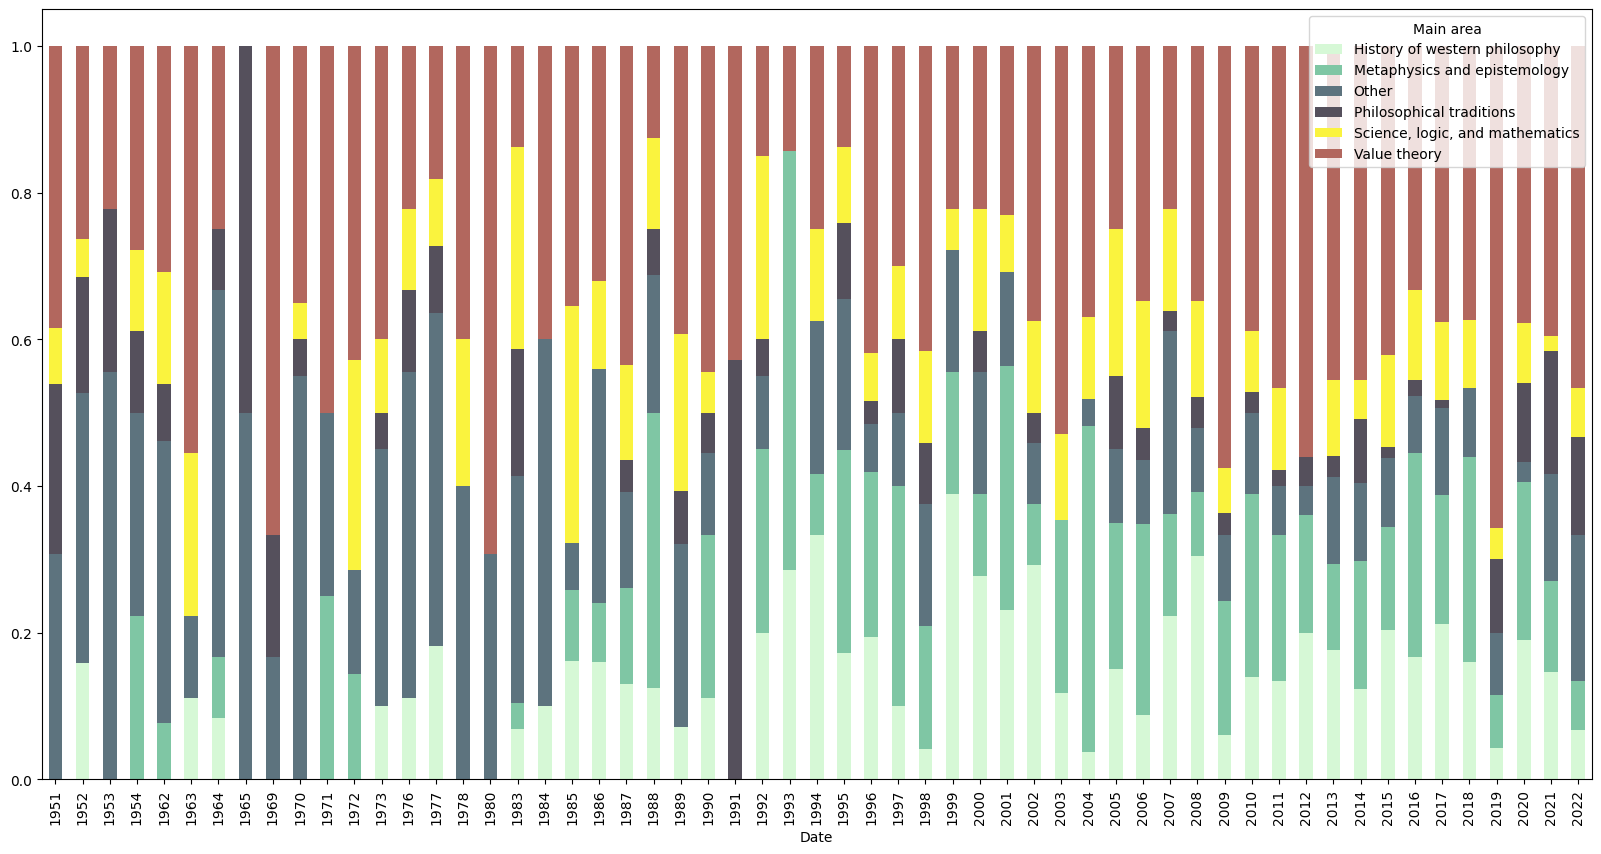

In [43]:
normalized_df_counts_main_area_per_year.plot(kind='bar', stacked=True, figsize=(20, 10))

## Stream graph

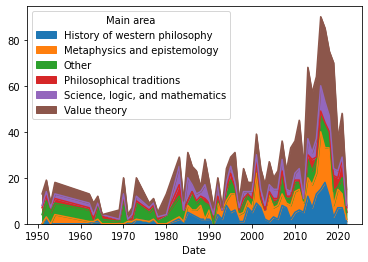

In [2]:
viz.plot_stream_graph()

In [ ]:
x = np.arange(1950, 2022, 5)

y = []
for topic in topics:
    topic_array = np.zeros(len(x))
    for doc in topic.docs:
        bin = (int(doc.date[:4]) - 1950) // 5
        topic_array[bin] += 1
    y.append(topic_array)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.stackplot(x, [y_ for y_ in y if np.mean(y_) > 1], baseline='sym')

Code copied from [Streamgraph with Python and Matplotlib
](https://www.python-graph-gallery.com/streamchart-basic-matplotlib)

In [ ]:
from scipy import stats

In [ ]:
def gaussian_smooth(x, y, sd):
    weights = np.array([stats.norm.pdf(x, m, sd) for m in x])
    weights = weights / weights.sum(1)
    return (weights * y).sum(1)

In [ ]:
pd.DataFrame(y).T.describe().T.sort_values('mean')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
y_smoothed = [gaussian_smooth(x, y_, 10) for y_ in y if y_.mean() > 1]
_ = ax.stackplot(x, y_smoothed, baseline="weighted_wiggle", labels=[topic.tag for topic in topics])
sns.despine(left=True)
plt.legend()

# Word plot

In [11]:
topic.top_word_evolution_table()

,"(1950, 1960)","(1960, 1970)","(1970, 1980)","(1980, 1990)","(1990, 2000)","(2000, 2010)","(2010, 2020)","(2020, 2030)"
0,kant,kant,kant,kant,kant,kant,kant,kant
1,razón,razón,razón,razón,razón,razón,razón,razón
2,kantiano,kantiano,kantiano,kantiano,kantiano,kantiano,kantiano,kantiano
3,ilustración,ilustración,ilustración,ilustración,ilustración,ilustración,ilustración,ilustración
4,biblia,biblia,biblia,biblia,práctico,crítica,prejuicio,prejuicio
5,práctico,práctico,práctico,práctico,crítica,práctico,crítica,crítica
6,crítica,crítica,crítica,crítica,naturaleza,prejuicio,práctico,práctico
7,naturaleza,naturaleza,naturaleza,naturaleza,biblia,naturaleza,naturaleza,naturaleza
8,hombre,hombre,hombre,prejuicio,prejuicio,hombre,viii,hombre
9,prejuicio,prejuicio,prejuicio,hombre,hombre,viii,hombre,viii


In [12]:
import matplotlib as mpl
# 10 color cycle'
colors = ["#8eac65","#f4b393","#140152","#22007c","#0d00a4", '#321325', '#fcdc4d', '#e01a4f', '#53b3cb', '#a3e7fc']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors) 

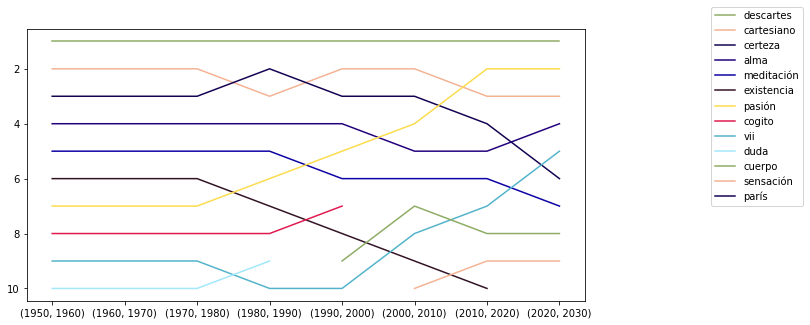

In [13]:
viz.plot_word_evolution_by_topic_graph(42) # This one is interesting

In [20]:
import matplotlib.pyplot as plt

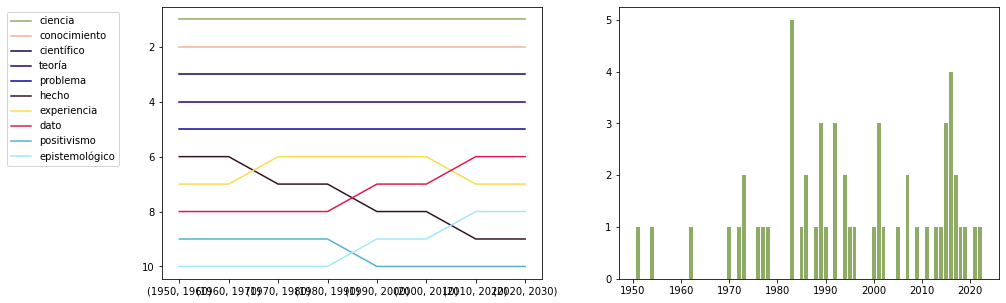

In [43]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

topic_id = 56
viz.plot_word_evolution_by_topic_graph(topic_id, ax=ax1)
viz.plot_number_of_documents_per_year(model.topics[topic_id], ax = ax2)
ax1.legend(bbox_to_anchor=(-0.1, 1))